## Lipo battery

A lithium-ion polymer battery (abbreviated as LiPo) is a assembly of elementary cells. The more the cells are provided, the bigger is the power and stored energy. The following figure gives an example of a Lipo battery with the following characteristics:
* **Voltage / Cell Count ("S")**: A LiPo cell has a nominal voltage of 3.7V (3V min, 4.2V max) . For the 7.4V battery above, this means that there are two cells in series (which means the voltage gets added together). This is sometimes why you will hear people talk about a "2S" battery pack - it means that there are 2 cells in Series. 
* **Capacity ("C")**: The capacity of a battery is basically a measure of the energy the battery can hold. The unit of measure here is milliamp hours (mAh). This is saying how much drain can be put on the battery to discharge it in one hour. The stored energy is given by the the product of voltage and thus here: Capacity (in Amps)*3600*7.4= 0.133 MJ 
* **Discharge Rating ("C" Rating)**: The C Rating is simply a measure of how fast the battery can be discharged safely and without harming the battery. The maximum safe continuous amp draw is here: 50C = 50 x Capacity (in Amps) = 250 A.

*LiPo Battery key parameters*
<img src="./pictures/LipoBattery.jpg" alt="Drawing" style="width: 400px;"/>


### Scaling laws for battery

$I_{max}^*=C_{bat}^*$

$M_{bat}^*=V_{bat}^* C_{bat}^*$

$E^*=Volume*$

### Validation of the scaling laws equations

We will use a catalog of a popular battery manufacturer for drones( [TATTU Batteries](https://www.genstattu.com/tattu-uav-battery.html?dir=asc&limit=all&order=capacitys)).

In [55]:
# Panda package Importation
import pandas as pd

# Read the .csv file with bearing data
path='./Data/'
df = pd.read_csv(path+'BatteryFamilies.csv', sep=';')
# Print the head (first lines of the file)
df.head()

,Brand,Model,Voltage_V,Capacity_mAh,Discharge_Rate_C,Max_Burst_Discharge_Rate_C,Weight_g,Max_burst_current_A,Volume_mm3,Energy_density_Wh_kg
0,TATTU,NaN,11.1,1300,75,150,122.0,97.50,59616.0,NaN
1,TATTU,NaN,11.1,1300,45,90,119.0,58.50,59616.0,NaN
2,TATTU,NaN,11.1,1550,75,150,136.0,116.25,63648.0,NaN
3,TATTU,NaN,11.1,1550,45,90,128.0,69.75,63648.0,NaN
4,TATTU,NaN,11.1,1800,45,90,156.0,81.00,64032.0,NaN


In [2]:
Imax_ref_TAT=250 #[A] max burst current ref TATTU
C_ref_TAT=10000 #[mAh] capacity ref TATTU
V_ref_TAT=14.8#[V] voltage ref TATTU
M_ref_TAT=940#[g] mass ref TATTU

Imax_ref_GENS=198 #[A] max burst current ref GENS
C_ref_GENS=3300 #[mAh] capacity ref GENS
V_ref_GENS=22.2#[V] voltage ref GENS
M_ref_GENS=506#[g] mass ref GENS

C_ref_KOK=30000 #[mAh] capacity ref KOKAM
V_ref_KOK=3.7#[V] voltage ref KOKAM
Volume_ref_KOK=431244 #[mm3] volume ref KOKAM
Eb_ref_KOK=111.36 #[Wh] energy density KOKAM
M_ref_KOK=870#[g] mass ref KOKAM


Imax_ref_PRO=25 #[A] max burst current ref PROLITEX
C_ref_PRO=500 #[mAh] capacity ref PROLITEX
V_ref_PRO=7.4#[V] voltage ref PROLITEX
M_ref_PRO=30#[g] mass ref PROLITEX

Imax_ref_RAM=45.5 #[A] max burst current ref RAMPAGE
C_ref_RAM=325 #[mAh] capacity ref RAMPAGE
V_ref_RAM=3.7#[V] voltage ref RAMPAGE
M_ref_RAM=12#[g] mass ref RAMPAGE


C_bats=[C_ref_GENS,C_ref_PRO,C_ref_RAM,C_ref_TAT]
Imax_bats=[Imax_ref_GENS,Imax_ref_PRO,Imax_ref_RAM,Imax_ref_TAT]
V_bats=[V_ref_GENS,V_ref_PRO,V_ref_RAM,V_ref_TAT]
M_bats=[M_ref_GENS,M_ref_PRO,M_ref_RAM,M_ref_TAT]

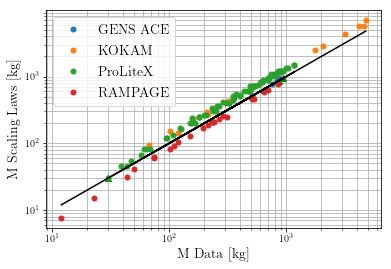

In [39]:
from matplotlib import pyplot as mp
from matplotlib import pyplot as plt

import pandas as pd

path='./Data/'
df = pd.read_csv(path+'BatteryFamilies-Cconstant.csv',sep=';',encoding = 'unicode_escape')

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

groups = df.groupby('Brand')

C2=df['Capacity_mAh'].values
V2=df['Voltage_V'].values
M2=df['Weight_g'].values

T_mot_ref_AXI=2.319#[Nm]
R_mot_ref_AXI= 0.03 #[Ohms]
K_mot_ref_AXI=0.02728#[N.m/A]

C_bats=[C_ref_GENS,C_ref_KOK,C_ref_PRO,C_ref_TAT]
V_bats=[V_ref_GENS,V_ref_KOK,V_ref_PRO, V_ref_TAT]
M_bats=[M_ref_GENS,M_ref_KOK,M_ref_PRO,M_ref_TAT]


Cvector=[]
Vvector=[]
Pro=[]
Mass_vector=[]
W=[]
Name=[]
for name, group in groups:
    Product=group.Capacity_mAh*group.Voltage_V
    Pro.append(Product)

for A,B,C,D in zip (C_bats, V_bats,Pro,M_bats):
    M=C/A/B*D
    Mass_vector.append(M)
    plt.plot(D,D,'^g')

#    print(D)

for name, group in groups:
    W.append(group.Weight_g)
    Name.append(name)
#print(W)
i=0
for i in range(len(W)-1):
    plt.plot(W[i], Mass_vector[i], marker='o', linestyle='', ms=5, 
label=Name[i])
    plt.plot(W[i], W[i], '-k',label='_nolegend')

plt.grid(True,which="both",ls="-")
plt.loglog()
plt.legend(fontsize=14)
#ax1.set_title('M data vs M Scaling Laws ',fontsize=14)
plt.ylabel('M Scaling Laws [kg]',fontsize=14)
plt.xlabel('M Data [kg]',fontsize=14)

plt.savefig('MdataMSL.pdf', dpi=1200, format='pdf')


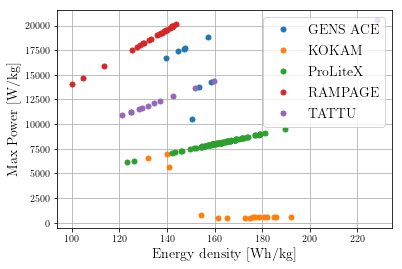

In [23]:
from matplotlib import pyplot as mp
from matplotlib import pyplot as plt

import pandas as pd

path='./Data/'
df = pd.read_csv(path+'BatteryFamilies-Cconstant.csv',sep=';',encoding = 'unicode_escape')

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

f, (ax1) = plt.subplots(1, 1)
groups = df.groupby('Brand')

for name, group in groups:
    ax1.plot(group.Energy_density_Wh_kg, group.Pmax_W_kg, marker='o', linestyle='', ms=5, 
label=name)

ax1.grid(True,which="both",ls="-")
#ax1.loglog()
ax1.legend(fontsize=14)
#ax1.set_title('M data vs M Scaling Laws ',fontsize=14)
ax1.set_xlabel('Energy density [Wh/kg]',fontsize=14)
ax1.set_ylabel('Max Power [W/kg]',fontsize=14)

plt.savefig('EnergyPower.pdf', dpi=1200, format='pdf')

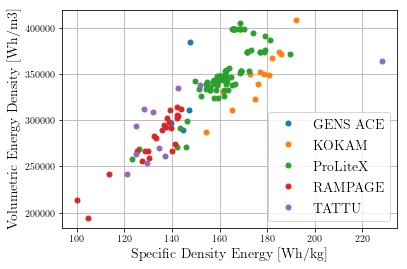

In [38]:
    from matplotlib import pyplot as mp
from matplotlib import pyplot as plt

import pandas as pd

path='./Data/'
df = pd.read_csv(path+'BatteryFamilies-Cconstant.csv',sep=';',encoding = 'unicode_escape')

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

f, (ax1) = plt.subplots(1, 1)
groups = df.groupby('Brand')

for name, group in groups:
    ax1.plot(group.Energy_density_Wh_kg, group.Pvol_Wh_m3, marker='o', linestyle='', ms=5, 
label=name)

ax1.grid(True,which="both",ls="-")
#ax1.loglog()
ax1.legend(fontsize=14)
#ax1.set_title('M data vs M Scaling Laws ',fontsize=14)
ax1.set_xlabel('Specific Density Energy [Wh/kg]',fontsize=14)
ax1.set_ylabel('Volumetric Energy Density [Wh/m3]',fontsize=14)

plt.savefig('SpecifVolumEnergy.pdf', dpi=1200, format='pdf')